In [27]:
import networkx  as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from backbone_disparity import disparity_filter


In [28]:
df = pd.read_pickle('../../../Files/test_0613_cross.pickle')
ratio3 = pd.read_pickle('../../../Files/test_0613_ratio_temp3.pickle')
ratio2 = pd.read_pickle('../../../Files/test_0613_ratio_temp2.pickle')
ratio = pd.concat([ratio3, ratio2])

In [29]:
ratio = pd.concat([ratio3, ratio2])
ratio.head()

,subreddit,crosspost_parent,crosspost_child,total,crosspost_parent_%,crosspost_child_%
0,COVID19,3,69,7833,0.000383,0.008809
1,Coronavirus,2,87,8000,0.000250,0.010875
2,CovidVaccinated,21,127,8000,0.002625,0.015875
3,DebateVaccines,311,76,2580,0.120543,0.029457
4,HermanCainAward,15,0,42,0.357143,0.000000


# Graph & Backboning

In [30]:
G = nx.Graph()

In [31]:
t = df['subreddit'].drop_duplicates().to_list()
t.extend(df['crosspost_parent'].drop_duplicates().to_list())
res = []
for i in t:
    if i not in res:
        res.append(i)
G.add_nodes_from(res)

In [32]:
e = df[['subreddit', 'crosspost_parent', 'count']].values.tolist()

In [33]:
for u, v, weight in e:
    G.add_edge(u, v)
    G[u][v]['weight'] = weight

In [34]:
alpha = 0.05
G = disparity_filter(G)
G2 = nx.Graph([(u, v, d) for u, v, d in G.edges(data=True) if d['alpha'] < alpha])
print('alpha = %s' % alpha)
print('original: nodes = %s, edges = %s' % (G.number_of_nodes(), G.number_of_edges()))
print('backbone: nodes = %s, edges = %s' % (G2.number_of_nodes(), G2.number_of_edges()))



alpha = 0.05
original: nodes = 9354, edges = 28200
backbone: nodes = 839, edges = 1152


### Trying with minimum limit on number of crossposts

In [35]:
t = df['subreddit'].drop_duplicates().to_list()
t.extend(df['crosspost_parent'].drop_duplicates().to_list())
res = []
for i in t:
    if i not in res:
        res.append(i)

In [36]:

G3 = nx.Graph()

G3.add_nodes_from(res)
for u, v, weight in e:
    if weight >= 2: # trying a filter of 5 to eliminate spurious connections
        G3.add_edge(u, v)
        G3[u][v]['weight'] = weight
print(f'Try with threshold = {2}')
print(f'Small before Nodes: {len(G3.nodes)}, Edges: {len(G3.edges)}')
print(f'Large Before Nodes: {len(G.nodes)}, Edges: {len(G.edges)}')
alpha = 0.05
G3 = disparity_filter(G3)
G4 = nx.Graph([(u, v, d) for u, v, d in G3.edges(data=True) if d['alpha'] < alpha])
print('Backboning Small')
print('alpha = %s' % alpha)
print('original: nodes = %s, edges = %s' % (G3.number_of_nodes(), G3.number_of_edges()))
print('backbone: nodes = %s, edges = %s' % (G4.number_of_nodes(), G4.number_of_edges()))

Try with threshold = 2
Small before Nodes: 9375, Edges: 11461
Large Before Nodes: 9354, Edges: 28200


KeyboardInterrupt: 

## Visual Analysis

In [ ]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):

    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

Text(0, 0.5, 'Frequency')

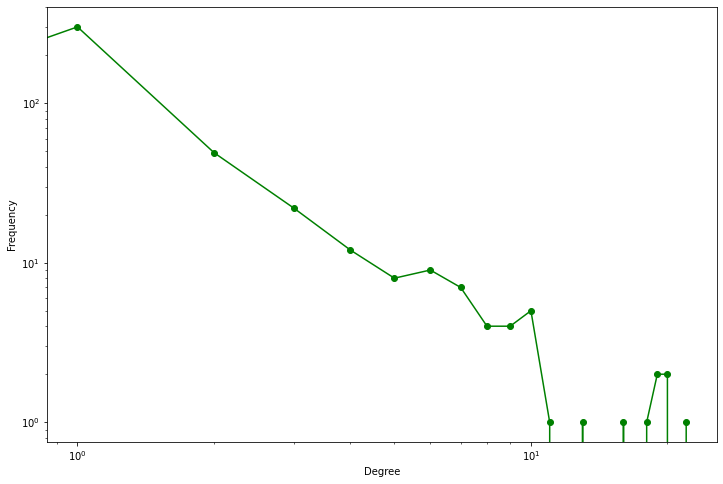

In [ ]:
in_degree_freq = degree_histogram_directed(G4, )
# out_degree_freq = degree_histogram_directed(G2, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
# plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')

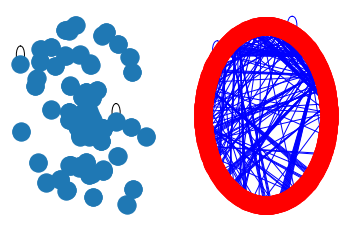

In [ ]:
import matplotlib.pyplot as plt

subax1 = plt.subplot(121)
nx.draw(G4)   # default spring_layout
subax2 = plt.subplot(122)
nx.draw(G4, pos=nx.circular_layout(G4), node_color='r', edge_color='b')

In [ ]:
print(list(nx.connected_components(G4)))
print(nx.number_connected_components(G4))

[{'FuckThatsViral', 'therewasanattempt', 'nottheonion', 'LabourUK', 'Anticommemes', 'r_kenmou', 'TOTALLYREALTWEETS', 'malaysia', 'teenagers', 'pics', 'JordanPeterson', 'funny', 'PublicFreakout', 'NEWPOLITIC', 'conspiracyhub', 'AOC', '2meirl42meirl4meirl', 'AnimalsBeingDerps', 'altnewz', 'Qult_Headquarters', 'CityPorn', 'NotoQanon', 'UKForeignPolicy', 'DeSantis', 'AnythingGoesNews', 'VoteDEM', 'TheNarcoblog701', 'aspiememes', 'neoliberal', 'bestof', 'libertarianmeme', 'ShitLiberalsSay', 'Government_is_lame', 'Futurology', 'NoLockdownsNoMasks', 'InterestingVideoClips', 'instant_regret', 'tumblr', 'AmongUs', 'TheRightCantMeme', 'starterpacks', 'NoNewNormalBan', 'LeopardsAteMyFace', 'KidsAreFuckingStupid', 'ATBGE', 'HolUp', 'InsaneParler', 'VaccineDiscussion', 'insanepeoplefacebook', 'NoShitSherlock', 'BrandNewSentence', 'coolguides', 'canada', 'badwomensanatomy', 'TheFightThatMatters', 'ConservativesOnly', 'BadChoicesGoodStories', 'chomsky', 'washingtondc', 'uninsurable', 'natureismetal',

In [ ]:
for j in list(nx.connected_components(G4)):
    print(j)
    print(len(j))
    print('\n')

{'FuckThatsViral', 'therewasanattempt', 'nottheonion', 'LabourUK', 'Anticommemes', 'r_kenmou', 'TOTALLYREALTWEETS', 'malaysia', 'teenagers', 'pics', 'JordanPeterson', 'funny', 'PublicFreakout', 'NEWPOLITIC', 'conspiracyhub', 'AOC', '2meirl42meirl4meirl', 'AnimalsBeingDerps', 'altnewz', 'Qult_Headquarters', 'CityPorn', 'NotoQanon', 'UKForeignPolicy', 'DeSantis', 'AnythingGoesNews', 'VoteDEM', 'TheNarcoblog701', 'aspiememes', 'neoliberal', 'bestof', 'libertarianmeme', 'ShitLiberalsSay', 'Government_is_lame', 'Futurology', 'NoLockdownsNoMasks', 'InterestingVideoClips', 'instant_regret', 'tumblr', 'AmongUs', 'TheRightCantMeme', 'starterpacks', 'NoNewNormalBan', 'LeopardsAteMyFace', 'KidsAreFuckingStupid', 'ATBGE', 'HolUp', 'InsaneParler', 'VaccineDiscussion', 'insanepeoplefacebook', 'NoShitSherlock', 'BrandNewSentence', 'coolguides', 'canada', 'badwomensanatomy', 'TheFightThatMatters', 'ConservativesOnly', 'BadChoicesGoodStories', 'chomsky', 'washingtondc', 'uninsurable', 'natureismetal', 

In [ ]:
lst = list(nx.connected_components(G4))

In [ ]:
'Arkansas' in lst[1]

False

In [ ]:
df2 = pd.DataFrame.from_dict(nx.degree_centrality(G4), orient='index', columns=['degree_centrality'])
df2 = df2.reset_index().rename(columns={'index': 'subreddit'})
df2['closeness_centrality'] = df2['subreddit'].map(nx.closeness_centrality(G4))
df2['degree'] = df2['subreddit'].map(G4.degree)

df2.head()

,subreddit,degree_centrality,closeness_centrality,degree
0,dankmemes,0.006993,0.143341,3
1,FuckYouKaren,0.023310,0.161962,10
2,aspiememes,0.044289,0.172423,19
3,sciencememes,0.004662,0.145361,2
4,meme,0.002331,0.141996,1


In [ ]:
df2.sort_values('degree_centrality',ascending=False).head()

,subreddit,degree_centrality,closeness_centrality,degree
41,RuralNewsNetwork,0.051282,0.176720,22
49,PublicFreakout,0.046620,0.185687,20
7,ABoringDystopia,0.046620,0.202056,20
2,aspiememes,0.044289,0.172423,19
8,MakeMeSuffer,0.044289,0.172031,19


In [ ]:
df2.to_csv('../../../Files/subs_backboned_2.csv')

# Analysis

In [ ]:
ratio.sort_values('crosspost_parent_%', ascending=False).head()

,subreddit,crosspost_parent,crosspost_child,total,crosspost_parent_%,crosspost_child_%
154,RimBob,39,0,39,1.000000,0.0
164,SurprisingNoOne,61,0,61,1.000000,0.0
291,patient_hackernews,6775,0,6781,0.999115,0.0
232,corruptscience,53,0,55,0.963636,0.0
168,TheFightThatMatters,1762,0,1852,0.951404,0.0


In [ ]:
ratio.sort_values('crosspost_child_%', ascending=False).head()

,subreddit,crosspost_parent,crosspost_child,total,crosspost_parent_%,crosspost_child_%
182,TruthLeaks,148,280,1280,0.115625,0.218750
250,hackernews,0,1183,7743,0.000000,0.152783
3,ATBGE,29,1104,7739,0.003747,0.142654
215,blursedimages,1,1098,8000,0.000125,0.137250
79,EnrichYourJourney,5,1,8,0.625000,0.125000


In [ ]:
df2 = pd.read_csv('../../Files/subs_backboned.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../../Files/subs_backboned.csv'

In [40]:
df3 = df2.merge(ratio, left_on='subreddit', right_on='subreddit', how='left')

In [ ]:
df3.drop(['Unnamed: 0'], axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [41]:
df3.head()

,subreddit,degree_centrality,closeness_centrality,degree,crosspost_parent,crosspost_child,total,crosspost_parent_%,crosspost_child_%
0,dankmemes,0.006993,0.143341,3,0.0,56.0,8000.0,0.000000,0.007000
1,FuckYouKaren,0.023310,0.161962,10,1458.0,44.0,7779.0,0.187428,0.005656
2,aspiememes,0.044289,0.172423,19,1987.0,29.0,5976.0,0.332497,0.004853
3,sciencememes,0.004662,0.145361,2,310.0,6.0,2556.0,0.121283,0.002347
4,meme,0.002331,0.141996,1,NaN,NaN,NaN,NaN,NaN


In [42]:
df3.mean(numeric_only=True)

degree_centrality          0.005052
closeness_centrality       0.101520
degree                     2.167442
crosspost_parent         504.102564
crosspost_child           67.112821
total                   5546.297436
crosspost_parent_%         0.148613
crosspost_child_%          0.012150
dtype: float64

In [ ]:
df3['crosspost_parent'].isna().sum()

235

In [46]:
import praw

CLIENT_ID = '5FpjYNUrv93rDqflbNE-6w'
CLIENT_SECRET = '5ZITWnmNd6_qCbPXDB90xmOaIMo9_w'
USER_NAME = 'theonejay96'
SCRIPT_NAME = 'Data\ Science\ Thesis'
LOGIN_PASSWORD = 'vejkyz-hyBfez-4cinte'

reddit =  praw.Reddit(
    client_id= CLIENT_ID ,
    client_secret= CLIENT_SECRET ,
    user_agent= SCRIPT_NAME,
    username= USER_NAME,
    password= LOGIN_PASSWORD)


Version 7.5.0 of praw is outdated. Version 7.6.0 was released Tuesday May 10, 2022.


In [ ]:
df3['subscribers'] = 0
df3['language'] = ''

In [47]:
from tqdm import tqdm
error = 0
for i, j in tqdm(df3.iterrows()):
    try:
        subreddit = reddit.subreddit(df3.loc[i]['subreddit'])
        df3.at[i,'subscribers'] = subreddit.subscribers
        df3.at[i,'language'] = subreddit.lang
    except:
        error += 1
        continue

430it [06:21,  1.13it/s]


In [48]:
error

21

In [49]:
df5 = df3[df3['language'] == '']

In [50]:
df5.shape

(21, 11)

In [51]:
df5.head(42)

,subreddit,degree_centrality,closeness_centrality,degree,crosspost_parent,crosspost_child,total,crosspost_parent_%,crosspost_child_%,subscribers,language
25,news,0.016317,0.199043,7,1.0,23.0,8000.0,0.000125,0.002875,0,
69,CoronavirusVariants,0.002331,0.127908,1,86.0,2.0,461.0,0.186551,0.004338,0,
72,Cringetopia,0.009324,0.166600,4,NaN,NaN,NaN,NaN,NaN,0,
89,GenZedong,0.002331,0.125781,1,NaN,NaN,NaN,NaN,NaN,0,
136,NoNewNormal,0.016317,0.079311,7,829.0,176.0,8000.0,0.103625,0.022000,0,
137,ConspiracyUltra,0.013986,0.088223,6,1264.0,10.0,1901.0,0.664913,0.005260,0,
138,CovidIsACult,0.002331,0.071535,1,145.0,2.0,174.0,0.833333,0.011494,0,
141,TrueAntiVaccination,0.013986,0.088223,6,871.0,17.0,2923.0,0.297982,0.005816,0,
156,SocialJusticeInAction,0.002331,0.148016,1,0.0,50.0,7167.0,0.000000,0.006976,0,
218,vacci_nation,0.002331,0.087610,1,124.0,3.0,1263.0,0.098179,0.002375,0,


In [ ]:
df3.head()

,subreddit,degree_centrality,closeness_centrality,degree,crosspost_parent,crosspost_child,total,crosspost_parent_%,crosspost_child_%,subscribers,language
0,dankmemes,0.006993,0.143341,3,0.0,56.0,8000.0,0.000000,0.007000,5780414,en
1,FuckYouKaren,0.023310,0.161962,10,1458.0,44.0,7779.0,0.187428,0.005656,1369874,en
2,aspiememes,0.044289,0.172423,19,1987.0,29.0,5976.0,0.332497,0.004853,113610,en
3,sciencememes,0.004662,0.145361,2,310.0,6.0,2556.0,0.121283,0.002347,362360,en
4,meme,0.002331,0.141996,1,NaN,NaN,NaN,NaN,NaN,2107004,en


In [52]:
df3['component'] = ''
for i, j in tqdm(df3.iterrows()):
    for k in range(len(lst)):
        if df3.loc[i]['subreddit'] in lst[k]:
            df3.at[i, 'component'] = k


430it [00:02, 194.51it/s]


In [53]:
df3.dtypes

subreddit                object
degree_centrality       float64
closeness_centrality    float64
degree                    int64
crosspost_parent        float64
crosspost_child         float64
total                   float64
crosspost_parent_%      float64
crosspost_child_%       float64
subscribers               int64
language                 object
component                object
dtype: object

In [54]:

df4 = df3[df3['subscribers'] > 500000]

In [55]:
df4

,subreddit,degree_centrality,closeness_centrality,degree,crosspost_parent,crosspost_child,total,crosspost_parent_%,crosspost_child_%,subscribers,language,component
0,dankmemes,0.006993,0.143341,3,0.0,56.0,8000.0,0.000000,0.007000,5781910,en,0
1,FuckYouKaren,0.023310,0.161962,10,1458.0,44.0,7779.0,0.187428,0.005656,1371270,en,0
4,meme,0.002331,0.141996,1,NaN,NaN,NaN,NaN,NaN,2109435,en,0
5,HolUp,0.018648,0.176309,8,1297.0,71.0,8000.0,0.162125,0.008875,3153563,en,0
6,memes,0.016317,0.181237,7,0.0,56.0,7000.0,0.000000,0.008000,19974103,en,0
...,...,...,...,...,...,...,...,...,...,...,...,...
382,ontario,0.002331,0.008786,1,NaN,NaN,NaN,NaN,NaN,557151,en,8
388,PrequelMemes,0.002331,0.139465,1,NaN,NaN,NaN,NaN,NaN,2163521,en,0
390,de,0.004662,0.004662,2,326.0,46.0,8000.0,0.040750,0.005750,656282,de,35
404,BrandNewSentence,0.002331,0.139465,1,NaN,NaN,NaN,NaN,NaN,1004418,en,0


In [ ]:
df3.to_csv('../../../Files/subs_backboned_subscribers_2.csv')

# Define Subs to pull

In [37]:
df3 = pd.read_csv('../../Files/subs_backboned_subscribers.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../../Files/subs_backboned_subscribers.csv'

In [38]:
df3 = df3.drop(['Unnamed: 0'], axis=1)

NameError: name 'df3' is not defined

In [56]:
df3.head()

,subreddit,degree_centrality,closeness_centrality,degree,crosspost_parent,crosspost_child,total,crosspost_parent_%,crosspost_child_%,subscribers,language,component
0,dankmemes,0.006993,0.143341,3,0.0,56.0,8000.0,0.000000,0.007000,5781910,en,0
1,FuckYouKaren,0.023310,0.161962,10,1458.0,44.0,7779.0,0.187428,0.005656,1371270,en,0
2,aspiememes,0.044289,0.172423,19,1987.0,29.0,5976.0,0.332497,0.004853,113815,en,0
3,sciencememes,0.004662,0.145361,2,310.0,6.0,2556.0,0.121283,0.002347,368581,en,0
4,meme,0.002331,0.141996,1,NaN,NaN,NaN,NaN,NaN,2109435,en,0


<AxesSubplot:xlabel='language'>

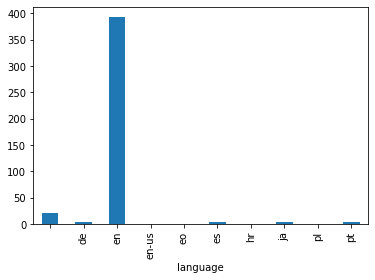

In [57]:
groupedLang = df3.groupby(by='language').size()
groupedLang.plot.bar()

<AxesSubplot:xlabel='component'>

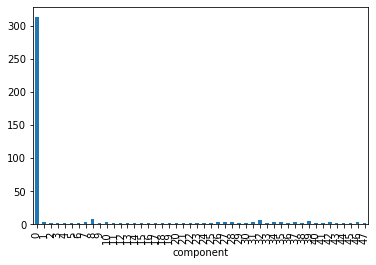

In [58]:
groupedcomp = df3.groupby(by='component').size()
groupedcomp.plot.bar()

array([[<AxesSubplot:title={'center':'closeness_centrality'}>,
        <AxesSubplot:title={'center':'degree'}>,
        <AxesSubplot:title={'center':'degree_centrality'}>],
       [<AxesSubplot:title={'center':'crosspost_parent'}>,
        <AxesSubplot:title={'center':'crosspost_child'}>,
        <AxesSubplot:title={'center':'total'}>],
       [<AxesSubplot:title={'center':'subscribers'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

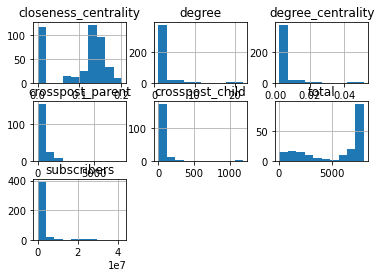

In [59]:
df3.hist(column=['closeness_centrality', 'degree', 'degree_centrality', 'crosspost_parent', 'crosspost_child', 'total', 'subscribers' ])

In [60]:
df6 = df3[(df3['language'] != 'en') & (df3['language'] != 'en-us') & (df3['language'] != 'en-uk') & (df3['language'] != '') & (~df3['language'].isna())]

In [61]:
foreign_lang_eng = ['AskReddit', 'CoronaVirusMemes', 'britposting', 'Instagramreality', 'TheLastAirbender', 'mildlyvagina', 'Wallstreetsilver', 'ArtefactPorn', 'neoliberal']

In [63]:
df6

,subreddit,degree_centrality,closeness_centrality,degree,crosspost_parent,crosspost_child,total,crosspost_parent_%,crosspost_child_%,subscribers,language,component
44,AskReddit,0.002331,0.130558,1,0.0,2.0,8000.0,0.000000,0.000250,36585818,es,0
148,brasilivre,0.006993,0.114601,3,734.0,25.0,8000.0,0.091750,0.003125,196864,pt,0
154,Mujico,0.002331,0.148016,1,624.0,30.0,7000.0,0.089143,0.004286,164444,es,0
200,brasil,0.002331,0.002331,1,NaN,NaN,NaN,NaN,NaN,973111,pt,9
201,coronabr,0.002331,0.002331,1,344.0,24.0,4541.0,0.075754,0.005285,149441,pt,9
204,britposting,0.002331,0.003108,1,NaN,NaN,NaN,NaN,NaN,7855,hr,10
236,neoliberal,0.004662,0.139636,2,354.0,40.0,8000.0,0.044250,0.005000,137383,eo,0
239,newsokuexp,0.009324,0.151677,4,459.0,17.0,8000.0,0.057375,0.002125,10177,ja,0
355,ArtefactPorn,0.002331,0.140067,1,NaN,NaN,NaN,NaN,NaN,2596777,pl,0
390,de,0.004662,0.004662,2,326.0,46.0,8000.0,0.040750,0.005750,656282,de,35


In [64]:
df7 = df6[~df6.subreddit.isin(foreign_lang_eng)]

In [65]:
df8 = pd.concat([df3, df7, df7]).drop_duplicates(keep=False)

## Remove subs from other components except specific Subs of Interes

In [66]:
df9 = df8[df8['component'] != 0]

In [67]:
df9.dtypes

subreddit                object
degree_centrality       float64
closeness_centrality    float64
degree                    int64
crosspost_parent        float64
crosspost_child         float64
total                   float64
crosspost_parent_%      float64
crosspost_child_%       float64
subscribers               int64
language                 object
component                object
dtype: object

In [68]:
keep_comp = ['CoronavirusMa', 'CoronavirusWA', 'Covidmx', 'censoredreality', 'IVMScience', 'ivermectin']
keep_comp_num = ['14', '17' ,'18', '19', '20', '22', '23', '24', '26', '3', '30', '31', '33', '34', '36', '37', '43', '7']

In [69]:
df10 = df9[~df9.component.isin(keep_comp_num)]

In [70]:
len(df10)

111

In [71]:
df11 = pd.concat([df8, df10, df10]).drop_duplicates(keep=False)

In [72]:
len(df11)

308

## Remove large unrelated subs

In [73]:
df12 = df11[df11['subscribers'] < 500000]
smallsubs = df12.subreddit.to_list()

In [74]:
df13 = df11[df11['subscribers'] >= 500000]

In [ ]:
import csv
file = open("smallsubs.csv", "w")
writer = csv.writer(file, delimiter = "\n")
for list_ in smallsubs:
     writer.writerow([list_])
file.close()

In [75]:
drop_large = ['Minecraft', 'pcmasterrace', 'AnimalsBeingBros', 'AnimalsBeingDerps', 'AnimalsBeingJerks', \
    'cats', 'ArtefactPorn', 'PrequelMemes', 'DunderMifflin', 'skyrim', 'lotrmemes', 'BoneAppleTea', \
    'dndmemes', 'AmongUs', 'Gamingcirclejerk', 'funny', 'gifs', 'Art', 'cats']

In [76]:
df14 = df13[~df13.subreddit.isin(drop_large)]

In [ ]:
df12.sort_values(by='subscribers')

,subreddit,degree_centrality,closeness_centrality,degree,crosspost_parent,crosspost_child,total,crosspost_parent_%,crosspost_child_%,subscribers,language,component
450,DebateVaccine,0.001193,0.177869,1,242.0,2.0,632.0,0.382911,0.003165,0,NaN,0
718,vaccinesideeffects,0.001193,0.149685,1,NaN,NaN,NaN,NaN,NaN,0,NaN,0
97,SocialJusticeInAction,0.003580,0.193375,3,0.0,50.0,7167.0,0.000000,0.006976,0,NaN,0
98,TheNarcoblog701,0.002387,0.191044,2,NaN,NaN,NaN,NaN,NaN,0,NaN,0
717,VaccineEnvy,0.001193,0.149685,1,NaN,NaN,NaN,NaN,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
530,conspiracytheories,0.001193,0.192973,1,132.0,37.0,7152.0,0.018456,0.005173,477958,en,0
389,geopolitics,0.001193,0.163382,1,NaN,NaN,NaN,NaN,NaN,485566,en,0
543,technews,0.001193,0.184169,1,NaN,NaN,NaN,NaN,NaN,491996,en,0
12,theyknew,0.028640,0.247688,24,2041.0,46.0,7625.0,0.267672,0.006033,492335,en,0


In [ ]:
largesubs = df14.subreddit.to_list()
import csv
file = open("largesubs.csv", "w")
writer = csv.writer(file, delimiter = "\n")
for list_ in largesubs:
     writer.writerow([list_])
file.close()

In [77]:
df15 = pd.concat([df12, df14])

In [78]:
df15

,subreddit,degree_centrality,closeness_centrality,degree,crosspost_parent,crosspost_child,total,crosspost_parent_%,crosspost_child_%,subscribers,language,component
2,aspiememes,0.044289,0.172423,19,1987.0,29.0,5976.0,0.332497,0.004853,113815,en,0
3,sciencememes,0.004662,0.145361,2,310.0,6.0,2556.0,0.121283,0.002347,368581,en,0
9,theyknew,0.023310,0.169462,10,2041.0,46.0,7625.0,0.267672,0.006033,495695,en,0
14,GreenAndPleasant,0.037296,0.177550,16,1211.0,266.0,7261.0,0.166781,0.036634,144999,en,0
15,LateStageImperialism,0.002331,0.158235,1,NaN,NaN,NaN,NaN,NaN,41248,en,0
...,...,...,...,...,...,...,...,...,...,...,...,...
316,greentext,0.002331,0.139465,1,NaN,NaN,NaN,NaN,NaN,1371933,en,0
356,HongKong,0.002331,0.157031,1,NaN,NaN,NaN,NaN,NaN,609560,en,0
358,canada,0.002331,0.108052,1,0.0,37.0,8000.0,0.000000,0.004625,1325584,en,0
359,KidsAreFuckingStupid,0.002331,0.123656,1,0.0,120.0,8000.0,0.000000,0.015000,3190847,en,0


In [82]:
df15.to_pickle('subreddits_picked_sm.pickle')

In [ ]:
df15 = pd.read_pickle('subreddits_picked.pickle')

In [ ]:
df15.head()

,subreddit,degree_centrality,closeness_centrality,degree,crosspost_parent,crosspost_child,total,crosspost_parent_%,crosspost_child_%,subscribers,language,component
1,aspiememes,0.039379,0.230555,33,1987.0,29.0,5976.0,0.332497,0.004853,111974,en,0
3,sciencememes,0.004773,0.207315,4,310.0,6.0,2556.0,0.121283,0.002347,325440,en,0
6,Anarcho_Capitalism,0.036993,0.272852,31,2039.0,122.0,8000.0,0.254875,0.015250,189088,en,0
7,ConservativeMemes,0.009547,0.229577,8,414.0,101.0,8000.0,0.051750,0.012625,59432,en,0
8,CoronavirusCirclejerk,0.026253,0.267132,22,1153.0,89.0,8000.0,0.144125,0.011125,51174,en,0


(array([452.,  87.,   0.,  44.,   0.,  20.,   0.,  19.,  14.,   0.,   9.,
          0.,   6.,   0.,   6.,   0.,   6.,   6.,   0.,   2.,   0.,   3.,
          0.,   3.,   0.,   1.,   4.,   0.,   1.,   0.,   4.,   0.,   1.,
          2.,   0.,   1.,   0.,   3.,   0.,   0.,   0.,   2.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.00119332, 0.00186158, 0.00252983, 0.00319809, 0.00386635,
        0.00453461, 0.00520286, 0.00587112, 0.00653938, 0.00720764,
        0.00787589, 0.00854415, 0.00921241, 0.00988067, 0.01054893,
        0.01121718, 0.01188544, 0.0125537 , 0.01322196, 0.01389021,
        0.01455847, 0.01522673, 0.01589499, 0.

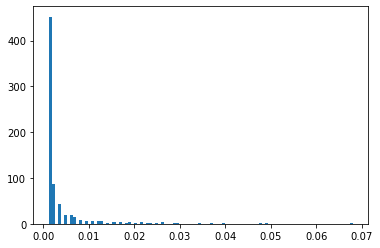

In [ ]:
plt.hist(df15.degree_centrality, bins=100)

In [91]:
df15.subreddit.to_csv('subreddits_sm.csv', index=False, header=False)

In [27]:
import csv
with open('subreddits.csv', newline='') as f:
    reader = csv.reader(f)
    subreddits = list(reader)

In [30]:
subreddits[0][0]

'aspiememes'